## Elliott Walker Assignment 12

Load the `ISLR2` and `tidyverse` packages.

In [1]:
library('ISLR2')
library('tidyverse')
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1  

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
Auto |> head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


Plot `mpg`  as a function of `displacement`.

`geom_smooth()` using formula = 'y ~ x'


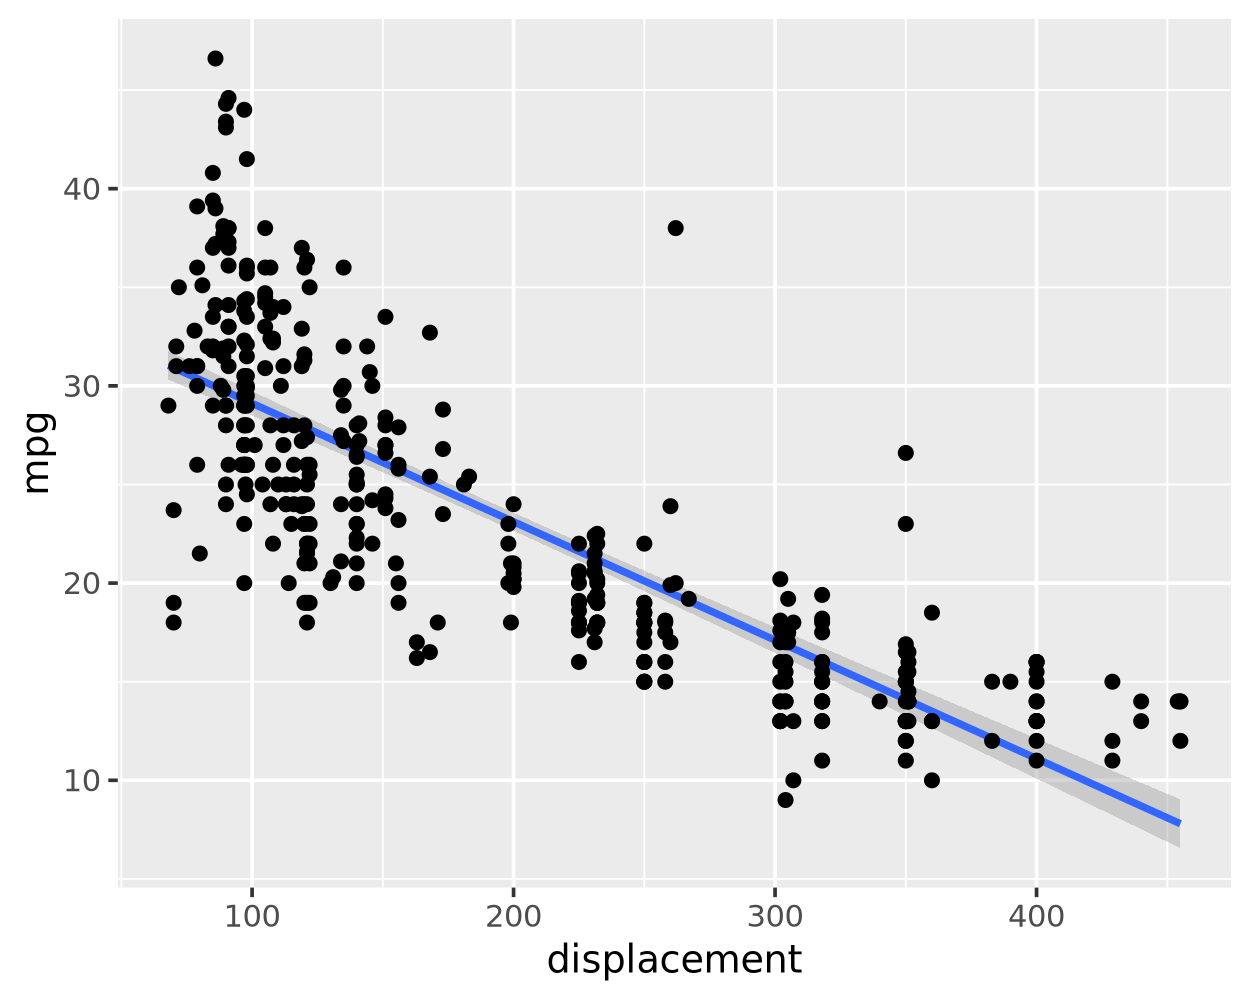

In [3]:

ggplot(Auto, aes(x=displacement,y=mpg)) +
    stat_smooth(method = "lm") +
    geom_point()


❓Does the relationship of `mpg` to `displacement` look linear?

#### While you could probably fit a reasonable line on this, the relationship is definitely NOT linear



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [4]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_poly(displacement, degree = 4, options = list(raw = TRUE)) |>
    prep()

rec |> juice() |> head()


cylinders,mpg,displacement_poly_1,displacement_poly_2,displacement_poly_3,displacement_poly_4
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,18,307,94249,28934443,8882874001
8,15,350,122500,42875000,15006250000
8,18,318,101124,32157432,10226063376
8,16,304,92416,28094464,8540717056
8,17,302,91204,27543608,8318169616
8,15,429,184041,78953589,33871089681


In [5]:
mod = linear_reg() |> set_engine('lm')

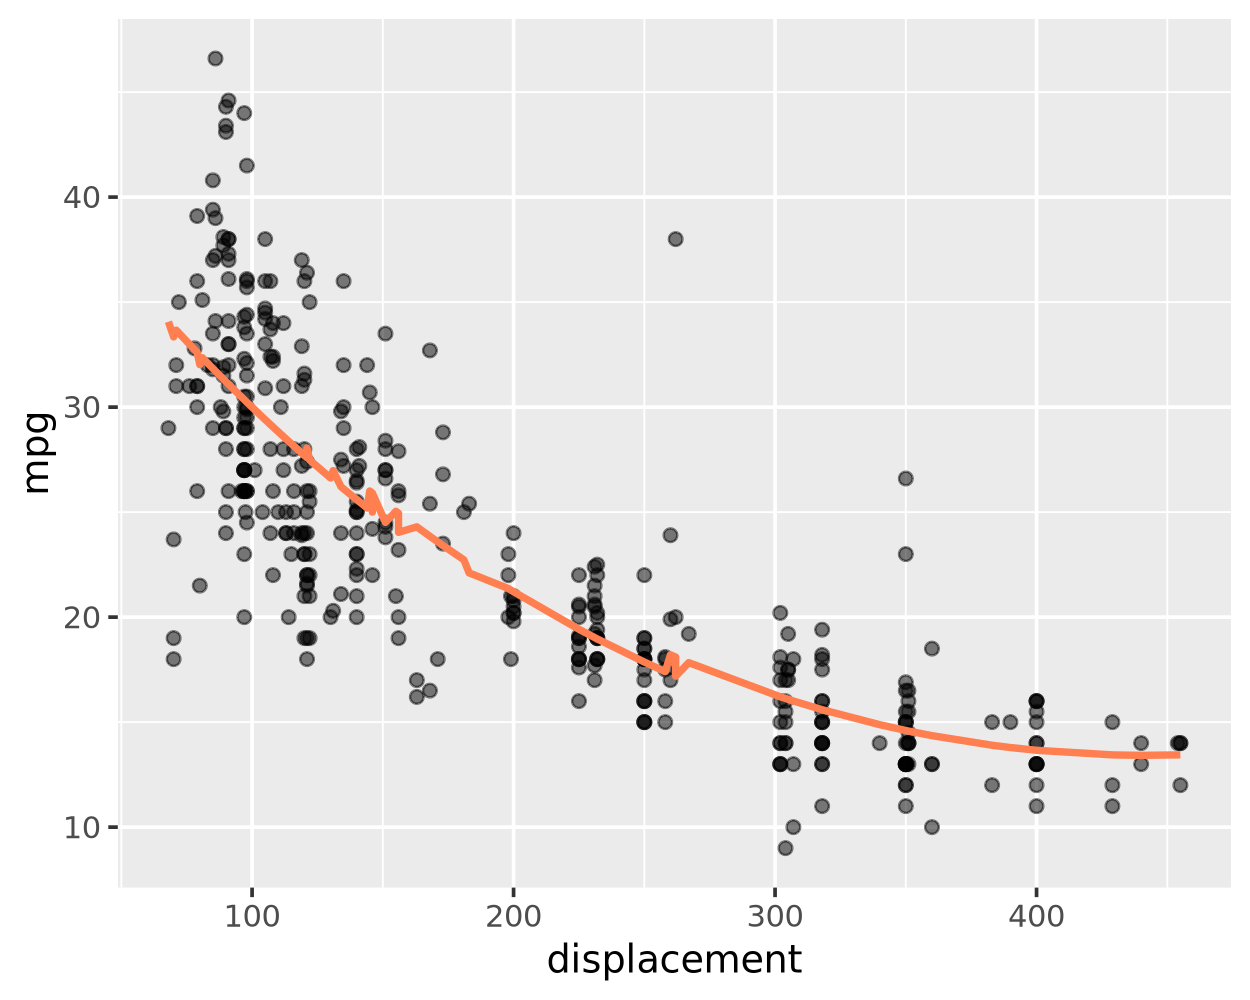

In [6]:
mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())

predict(mod_fit, rec |> juice()) |> bind_cols(Auto) |> 
ggplot(aes(x = displacement)) +
    geom_point(aes(y = mpg), alpha = 0.5) +
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1)